# Tarea - Caminata aleatoria

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D.

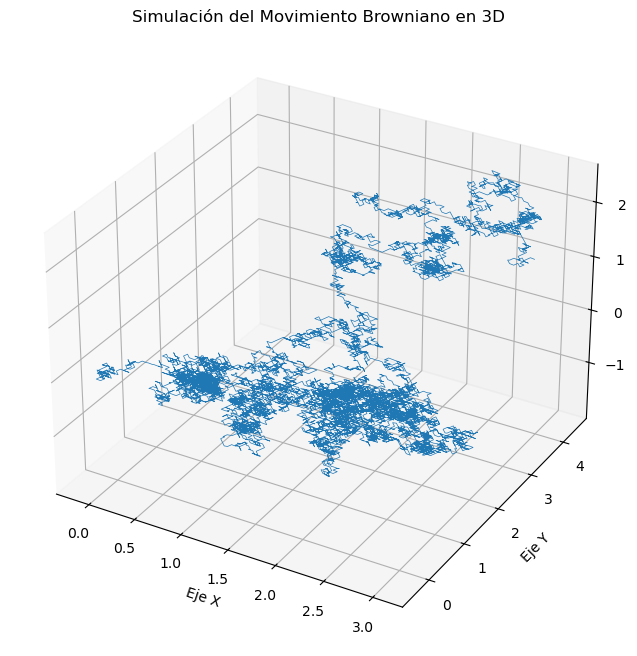

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros de la simulación
dt = 0.001  # intervalo de tiempo
total_time = 10  # total de tiempo en segundos
n_steps = int(total_time / dt)  # número total de pasos

# Inicialización de las posiciones
W_x = np.zeros(n_steps)
W_y = np.zeros(n_steps)
W_z = np.zeros(n_steps)

# Simulación del movimiento browniano
for i in range(1, n_steps):
    X_i = np.random.choice([-1, 1])  # elegir -1 o 1 aleatoriamente
    W_x[i] = W_x[i-1] + X_i * np.sqrt(dt)
    
    X_i = np.random.choice([-1, 1])  # para Y
    W_y[i] = W_y[i-1] + X_i * np.sqrt(dt)
    
    X_i = np.random.choice([-1, 1])  # para Z
    W_z[i] = W_z[i-1] + X_i * np.sqrt(dt)

# Gráfico en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(W_x, W_y, W_z, lw=0.5)

# Etiquetas
ax.set_title('Simulación del Movimiento Browniano en 3D')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.show()


#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

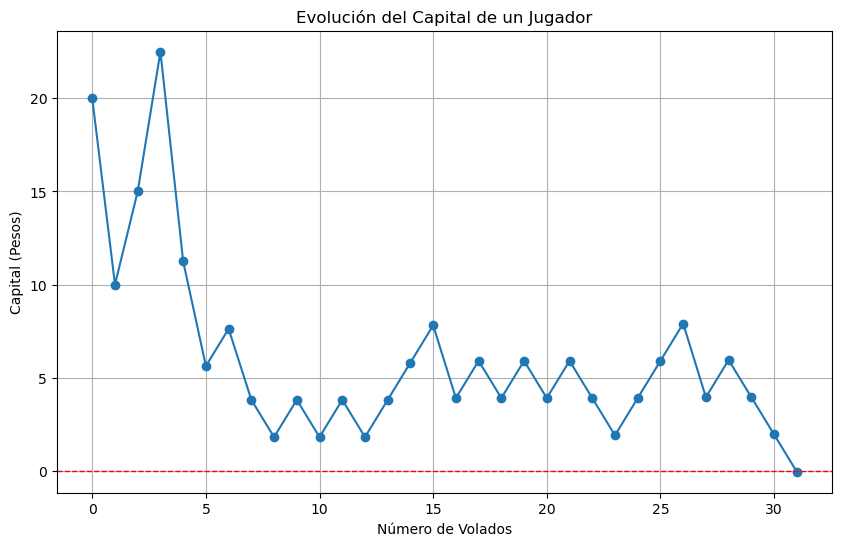

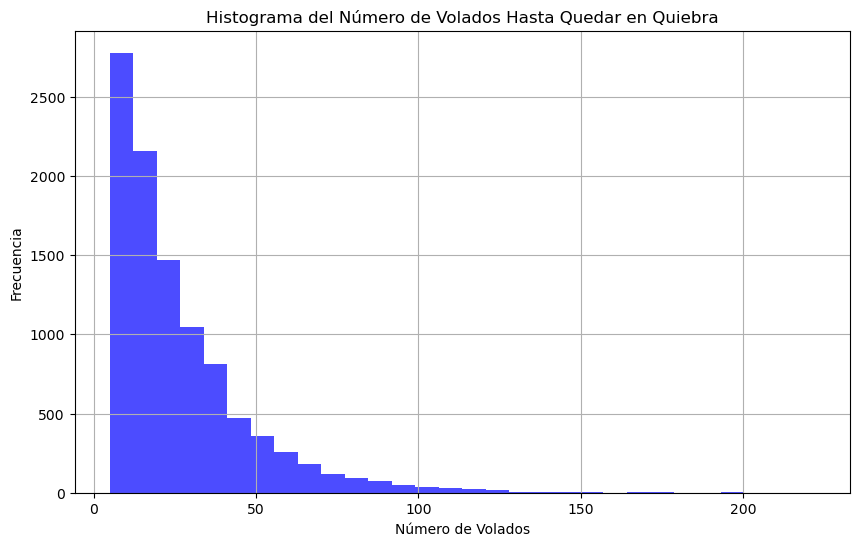

Número promedio de volados hasta quedar en quiebra: 26.34


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Evolución del capital hasta quedar en cero
def simular_apuesta():
    capital_inicial = 20
    capital = capital_inicial
    capital_evolucion = [capital]  # Lista para almacenar la evolución del capital

    while capital > 0:
        if capital >= 6:
            apuesta = capital / 2
        else:
            apuesta = 2
        
        resultado = np.random.choice([-1, 1])  # -1 pierde, 1 gana
        capital += apuesta * resultado
        capital_evolucion.append(capital)

    return capital_evolucion

# Simulamos una apuesta y graficamos
capital_evolucion = simular_apuesta()
plt.figure(figsize=(10, 6))
plt.plot(capital_evolucion, marker='o')
plt.title("Evolución del Capital de un Jugador")
plt.xlabel("Número de Volados")
plt.ylabel("Capital (Pesos)")
plt.grid()
plt.axhline(0, color='red', linestyle='--', lw=1)
plt.show()

# Parte 2: Simulación Monte Carlo para 10,000 apostadores
def simulacion_monte_carlo(num_jugadores=10000):
    num_volados = []
    
    for _ in range(num_jugadores):
        capital = 20
        volados = 0
        
        while capital > 0:
            if capital >= 6:
                apuesta = capital / 2
            else:
                apuesta = 2
            
            resultado = np.random.choice([-1, 1])  # -1 pierde, 1 gana
            capital += apuesta * resultado
            volados += 1
        
        num_volados.append(volados)
    
    return num_volados

# Ejecutamos la simulación
num_jugadores = 10000
num_volados = simulacion_monte_carlo(num_jugadores)

# Parte 3: Histograma del número de volados
plt.figure(figsize=(10, 6))
plt.hist(num_volados, bins=30, color='blue', alpha=0.7)
plt.title("Histograma del Número de Volados Hasta Quedar en Quiebra")
plt.xlabel("Número de Volados")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

# Calcular y mostrar el número promedio de volados hasta quedar en quiebra
promedio_volados = np.mean(num_volados)
print(f"Número promedio de volados hasta quedar en quiebra: {promedio_volados:.2f}")
